# Project Description
You work for the OilGiant mining company.

OilGiant mining company is looking to expand into new territory.

# Project's Goal

Find the best place for a new well. (the region with the highest average profit with risk of loss lower than 2.5%.)


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Load, overview and prepare the data</h2>
</div>

updating libraries:

In [1]:
!pip install pandas --upgrade
!pip install seaborn --upgrade    
!pip install -U scikit-learn --upgrade 

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: pandas in /home/jovyan/.local/lib/python3.7/site-packages (1.3.4)
Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: seaborn in /home/jovyan/.local/lib/python3.7/site-packages (0.11.2)
Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: scikit-learn in /home/jovyan/.local/lib/python3.7/site-packages (1.0)


Import libraries:

In [2]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyRegressor

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import scipy.stats as st
import math as mt

#ignoring warning
import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

make a try-except block in order to avoid file path error when working both locally and remotely.

In [4]:
try:
    df0 = pd.read_csv('geo_data_0.csv')
    df1 = pd.read_csv('geo_data_1.csv')
    df2 = pd.read_csv('geo_data_2.csv')
    
except:   
    df0 = pd.read_csv('/datasets/geo_data_0.csv')
    df1 = pd.read_csv('/datasets/geo_data_1.csv')
    df2 = pd.read_csv('/datasets/geo_data_2.csv')

### df0:

Check the table's first 5 rows to see the general information.

In [5]:
df0.head()

,id,f0,f1,f2,product
0,txEyH,0.706,-0.498,1.221,105.280
1,2acmU,1.335,-0.340,4.365,73.038
2,409Wp,1.023,0.152,1.420,85.266
3,iJLyR,-0.032,0.139,2.979,168.621
4,Xdl7t,1.988,0.155,4.752,154.037


Check the table's general structure:

In [6]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


We already see we dont have missing values in df0.

Removing id column - a non-numeric variable that does not provide useful information to the model and can misslead.

In [7]:
df0 = df0.drop(['id'], axis=1)

checking for duplicates:

In [8]:
df0.duplicated().sum()

0

checking the table's initial statistics:

In [9]:
df0.describe()

,f0,f1,f2,product
count,100000.000,100000.000,100000.000,100000.000
mean,0.500,0.250,2.503,92.500
std,0.872,0.504,3.248,44.289
min,-1.409,-0.848,-12.088,0.000
25%,-0.073,-0.201,0.288,56.498
50%,0.502,0.250,2.516,91.850
75%,1.074,0.701,4.715,128.564
max,2.362,1.344,16.004,185.364


the table's numeric features correlations:

In [10]:
df0.corr()

,f0,f1,f2,product
f0,1.000,-0.441,-0.003,0.144
f1,-0.441,1.000,0.002,-0.192
f2,-0.003,0.002,1.000,0.484
product,0.144,-0.192,0.484,1.000


plotting our corr table for easier understanding:

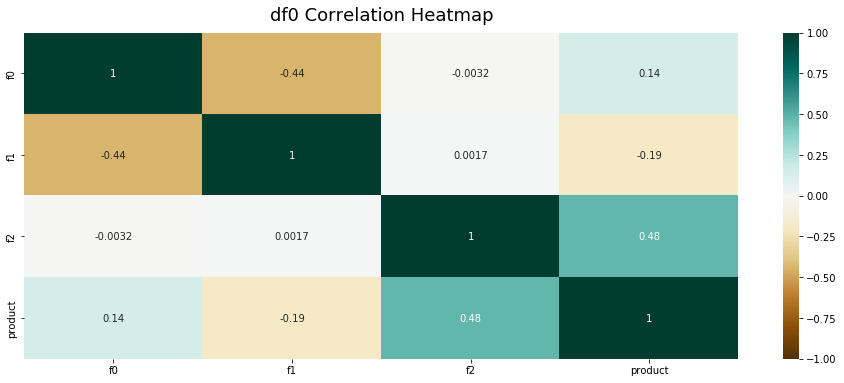

In [11]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('df0 Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

##### Description:
this heatmap shows the correlation between numeric features in our df0 dataset.
- The strongest correlation (positive corr) is between f2 and product(our target), with value of 0.48.
- f0 negativley correlates with f1 (-0.44).

#### Conclusion:

- We dont have missing values in df0
- We dont have duplicates in df0
- feature f2 correlates with product(target) with value of 0.48.
- We have removed id column as it is not useful for our task and can misslead our future model.

### df1:

Check the table's first 5 rows to see the general information.

In [12]:
df1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001,-8.276,-0.006,3.179
1,62mP7,14.272,-3.475,0.999,26.953
2,vyE1P,6.263,-5.948,5.001,134.766
3,KcrkZ,-13.081,-11.506,4.999,137.945
4,AHL4O,12.702,-8.147,5.004,134.766


Check the table's general structure:

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


We already see we dont have missing values in df1.

Removing id column - a non-numeric variable that does not provide useful information to the model and can misslead.

In [14]:
df1 = df1.drop(['id'], axis=1)

Checking for duplicates

In [15]:
df1.duplicated().sum()

0

checking the table's initial statistics:

In [16]:
df1.describe()

,f0,f1,f2,product
count,100000.000,100000.000,100000.000,100000.000
mean,1.141,-4.797,2.495,68.825
std,8.966,5.120,1.704,45.944
min,-31.610,-26.359,-0.018,0.000
25%,-6.299,-8.268,1.000,26.953
50%,1.153,-4.813,2.011,57.086
75%,8.621,-1.333,4.000,107.813
max,29.422,18.734,5.020,137.945


the table's numeric features correlations:

In [17]:
df1.corr()

,f0,f1,f2,product
f0,1.000,0.182,-0.002,-0.030
f1,0.182,1.000,-0.003,-0.010
f2,-0.002,-0.003,1.000,0.999
product,-0.030,-0.010,0.999,1.000


plotting our corr table for better understanding:

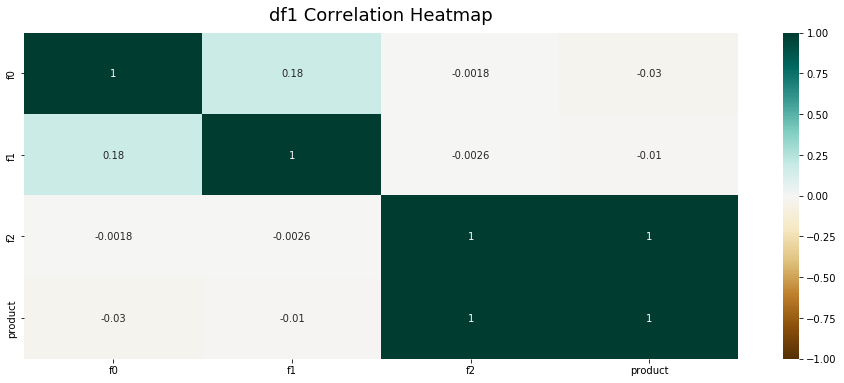

In [18]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('df1 Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

##### Description:
this heatmap shows the correlation between numeric features in our df1 dataset.
- The strongest correlation (positive corr) is between f2 and product(our target), with value of 0.999 !.

#### Conclusion:
- We dont have missing values in df1
- We dont have duplicates in df1
- feature f2 correlates heavily with product(target) with value of 0.99.
- We have removed id column as it is not useful for our task and can misslead our future model.

### df2:

Check the table's first 5 rows to see the general information.

In [19]:
df2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.147,0.963,-0.829,27.759
1,WJtFt,0.263,0.270,-2.530,56.070
2,ovLUW,0.195,0.289,-5.586,62.872
3,q6cA6,2.236,-0.554,0.930,114.573
4,WPMUX,-0.516,1.716,5.899,149.601


Check the table's general structure:

In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


We already see we dont have missing values in df2.

Removing id column - a non-numeric variable that does not provide useful information to the model and can misslead.

In [21]:
df2 = df2.drop(['id'], axis=1)

Checking for duplicates:

In [22]:
df2.duplicated().sum()

0

checking the table's initial statistics:

In [23]:
df2.describe()

,f0,f1,f2,product
count,100000.000,100000.000,100000.000,100000.000
mean,0.002,-0.002,2.495,95.000
std,1.732,1.730,3.473,44.750
min,-8.760,-7.084,-11.970,0.000
25%,-1.162,-1.175,0.130,59.450
50%,0.009,-0.009,2.484,94.926
75%,1.159,1.164,4.859,130.595
max,7.238,7.845,16.739,190.030


the table's numeric features correlations:

In [24]:
df2.corr()

,f0,f1,f2,product
f0,1.000,0.001,-0.000,-0.002
f1,0.001,1.000,0.001,-0.001
f2,-0.000,0.001,1.000,0.446
product,-0.002,-0.001,0.446,1.000


plotting our corr table for better understanding:

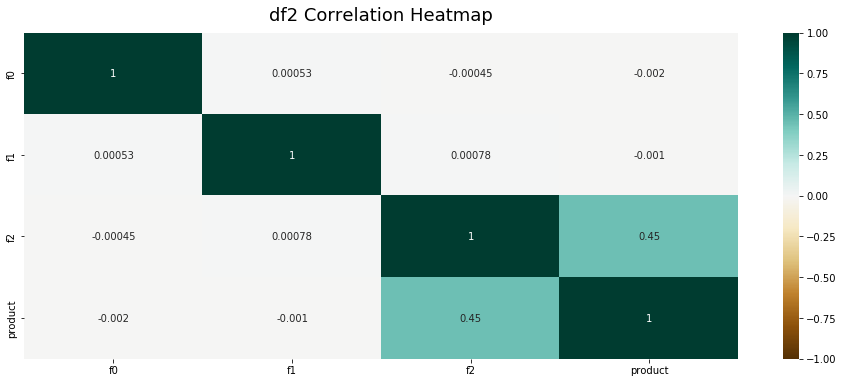

In [25]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df2.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('df2 Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

##### Description:
this heatmap shows the correlation between numeric features in our df2 dataset.
- The strongest correlation (positive corr) is between f2 and product(our target), with value of 0.45.

#### Conclusion:
- We dont have missing values in df2
- We dont have duplicates in df2
- feature f2 correlates heavily with product(target) with value of 0.45.
- We have removed id column as it is not useful for our task and can misslead our future model.

### Conclusion:
- We have no duplicates in all dataframes.
- We have no missing values in all dataframes.
- We have removed the id column from all dataframes.
- df1.f2 correlates with our target (product) at nearly perfect correlation (0.999).

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Model train & test for each region</h2>
</div>

Split the data into a training set and validation set:

The ratio of the sets will be 75:25 (train, valid)

### df0:

defining random_state to be constant for all random_state usages:

In [26]:
RANDOM_STATE = 42

slicing features and target and printing the shapes:

In [27]:
target0 = df0['product']
features0 = df0.drop(['product'], axis=1)
display(target0.shape, features0.shape)

(100000,)

(100000, 3)

splitting to training and validation sets and printing the shapes:

In [28]:
features_train0, features_valid0, target_train0, target_valid0 = train_test_split(
    features0, target0, test_size=0.25, random_state=RANDOM_STATE)
display(features_train0.shape, features_valid0.shape, target_train0.shape, target_valid0.shape)

(75000, 3)

(25000, 3)

(75000,)

(25000,)

#### Scaling numeric features:

Scaling features across the entire dataset can lead to a data leak. We will only fit the scaler on the train set. We will then use the fitted scaler and apply it to our other set.

In [29]:
# #feature scaler
# scaler0 = StandardScaler()
# scaler0.fit(features_train0)

# #features
# features_train0_norm = scaler0.transform(features_train0)
# features_valid0_norm = scaler0.transform(features_valid0)

convert the array to a dataframe to be able to see each feature separately:

In [30]:
# col_names = features_train0.columns
# features_train0_norm = pd.DataFrame(features_train0_norm, columns=col_names)

#### Model training

In [31]:
model0 = LinearRegression()

model0.fit(features_train0, target_train0)

predicted_valid0 = model0.predict(features_valid0)

# calculate RMSE score
print('RMSE:', round(mean_squared_error(target_valid0, predicted_valid0, squared=False), 2))

# calculate Average volume of product predicted.
print('Average volume of product predicted:', round(predicted_valid0.mean(), 2))

RMSE: 37.76
Average volume of product predicted: 92.4


dataframe containing the target and predictions:

In [32]:
df_target_predictions_valid0 = pd.DataFrame(target_valid0)
df_target_predictions_valid0['predicted'] = predicted_valid0
df_target_predictions_valid0.head()

,product,predicted
75721,122.073,101.901
80184,48.739,78.218
19864,131.338,115.267
76699,88.328,105.619
92991,36.959,97.980


#### Sanity check:

In [33]:
dummyregressor_model0 = DummyRegressor(strategy='mean') 

dummyregressor_model0.fit(features_train0, target_train0)
dummy_pred0 = dummyregressor_model0.predict(features_valid0)

#print dummy RMSE:
print('geo0\'s dummy RMSE:',np.sqrt(mean_squared_error(target_valid0, dummy_pred0)))

geo0's dummy RMSE: 44.27723501700235


#### Conclusion:
- Our model's RMSE is 37.76 with average predicted volume of 92.4.
- Our model acts better than dummy regressor(baseline constant model that predicts the mean)

### df1:

slicing features and target and printing the shapes:

In [34]:
target1 = df1['product']
features1 = df1.drop(['product'], axis=1)
display(target1.shape, features1.shape)

(100000,)

(100000, 3)

splitting to training and validation sets and printing the shapes:

In [35]:
features_train1, features_valid1, target_train1, target_valid1 = train_test_split(
    features1, target1, test_size=0.25, random_state=RANDOM_STATE)
display(features_train1.shape, features_valid1.shape, target_train1.shape, target_valid1.shape)

(75000, 3)

(25000, 3)

(75000,)

(25000,)

#### Model training

In [36]:
model1 = LinearRegression()

model1.fit(features_train1, target_train1)

predicted_valid1 = model1.predict(features_valid1)

print('RMSE:', round(mean_squared_error(target_valid1, predicted_valid1, squared=False), 2))

# Calculating Average volume of product predicted.
print('Average volume of product predicted:', round(predicted_valid1.mean(), 2))

RMSE: 0.89
Average volume of product predicted: 68.71


dataframe containing the target and predictions:

In [37]:
df_target_predictions_valid1 = pd.DataFrame(target_valid1)
df_target_predictions_valid1['predicted'] = predicted_valid1
df_target_predictions_valid1.head()

,product,predicted
75721,0.000,0.845
80184,53.907,52.922
19864,134.766,135.110
76699,107.813,109.495
92991,0.000,-0.047


#### Sanity check:

In [38]:
dummyregressor_model1 = DummyRegressor(strategy='mean') 

dummyregressor_model1.fit(features_train1, target_train1)
dummy_pred1 = dummyregressor_model0.predict(features_valid1)

#print dummy RMSE:
print('geo1\'s dummy RMSE:',np.sqrt(mean_squared_error(target_valid1, dummy_pred1)))

geo1's dummy RMSE: 51.75815779076904


#### Conclusion:
- Our model's RMSE is 0.89 with average predicted volume of 68.71.
- Our model acts way better than dummy regressor(baseline constant model that predicts the mean).

### df2:

slicing features and target and printing their shape:

In [39]:
target2 = df2['product']
features2 = df2.drop(['product'], axis=1)
display(target2.shape, features2.shape)

(100000,)

(100000, 3)

splitting to training and validation sets and printing the shapes:

In [40]:
features_train2, features_valid2, target_train2, target_valid2 = train_test_split(
    features2, target2, test_size=0.25, random_state=RANDOM_STATE)
display(features_train2.shape, features_valid2.shape, target_train2.shape, target_valid2.shape)

(75000, 3)

(25000, 3)

(75000,)

(25000,)

#### model training

In [41]:
model2 = LinearRegression()

# Training.
model2.fit(features_train2, target_train2)

# Predicting validation set.
predicted_valid2 = model2.predict(features_valid2)

# Calculating RMSE score.
print('RMSE:', round(mean_squared_error(target_valid2, predicted_valid2, squared=False), 2))

# Calculating Average volume of product predicted.
print('Average volume of product predicted:', round(predicted_valid2.mean(), 2))

RMSE: 40.15
Average volume of product predicted: 94.77


dataframe containing the target and predicitions:

In [42]:
df_target_predictions_valid2 = pd.DataFrame(target_valid2)
df_target_predictions_valid2['predicted'] = predicted_valid2
df_target_predictions_valid2.head()

,product,predicted
75721,117.441,98.302
80184,47.841,101.592
19864,45.883,52.449
76699,139.015,109.922
92991,84.004,72.412


#### sanity check:

In [43]:
dummyregressor_model2 = DummyRegressor(strategy='mean') 

dummyregressor_model2.fit(features_train2, target_train2)
dummy_pred2 = dummyregressor_model0.predict(features_valid2)

#print dummy RMSE:
print('geo2\'s dummy RMSE:',np.sqrt(mean_squared_error(target_valid2, dummy_pred2)))

geo2's dummy RMSE: 44.85733086265198


#### Conclusion:
- Our model's RMSE is 40.15 with average predicted volume of 94.77.
- Our model acts better than dummy regressor(baseline constant model that predicts the mean).

printing the models RMSEs & predicted volumes in a table for clear comparison:

In [44]:
round(predicted_valid2.mean(), 2)

94.77

creating lists of the values for the table and passing it to the table and printing it:

In [45]:
regions = ['Region 0', 'Region 1', 'Region 2']
rmse_scores = [round(mean_squared_error(target_valid0, predicted_valid0, squared=False), 2), 
               round(mean_squared_error(target_valid1, predicted_valid1, squared=False), 2),
               round(mean_squared_error(target_valid2, predicted_valid2, squared=False), 2)
              ]

dummy_rmse = [np.sqrt(mean_squared_error(target_valid0, dummy_pred0)), 
              np.sqrt(mean_squared_error(target_valid1, dummy_pred1)),
              np.sqrt(mean_squared_error(target_valid2, dummy_pred2))
             ]
volume_predicted = [round(predicted_valid0.mean(), 2),
                    round(predicted_valid1.mean(), 2),
                    round(predicted_valid2.mean(), 2)
                   ]

#creating the df
regions_df = (pd.DataFrame({'Region':regions, 'RMSE':rmse_scores, 'Dummy RMSE':dummy_rmse, 
                                'Average volume of product':volume_predicted }).sort_values(by='Region').reset_index(drop=True))

In [46]:
regions_df

,Region,RMSE,Dummy RMSE,Average volume of product
0,Region 0,37.760,44.277,92.400
1,Region 1,0.890,51.758,68.710
2,Region 2,40.150,44.857,94.770


### Conclusion:

- Region 0 and region 2 are similar in terms of data, predictions and model quality.
- Region 1 has the lowest RMSE with value of 0.89, probably due to its highly correlated feature that we discovered eariler.
- Region 0 and region 2 have a higher average volume of product than region 1, but taking into consideration their error rate is about 40,than it would be reasonable to say that they might yeild a similar result to region 1.

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Profit Calculation</h2>
</div>

conditions for our profit calculation function:

In [47]:
# amount of wells to develop
oil_wells = 200

# wells development budget
budget = 100000000

# profit per barrel
barrel_profit = 4.5

# profit per unit of product
product_profit = barrel_profit * 1000

#### Volume of reserves sufficient for developing a new well without losses.

Checking the amount of units to break even

In [48]:
well_budget = budget / oil_wells
break_even = well_budget / product_profit

print('Break even (to start having profit): {} units of product per well'.format(round(break_even, 2)))

Break even (to start having profit): 111.11 units of product per well


Average units of product of wells for each region as predicted by our model.

In [49]:
x = 0
for vp in volume_predicted:
    print('Average volume of product for region {}: {}'.format(x, vp))
    x += 1

Average volume of product for region 0: 92.4
Average volume of product for region 1: 68.71
Average volume of product for region 2: 94.77


##### Conclusion:
- The average product per well is not high enough to break even.
- It just means that the average is probably low for more lower volume wells that are being predicted, but there are wells that have higher product volume than the average in our predictions.

#### Profit calculation function

In [50]:
def profit_calc(wells_df, profit, amount):
    
    
    wells_df = wells_df.sort_values(by=['predicted'], ascending=False).head(amount)
    
    
    product_sum = wells_df['product'].sum()
    predicted_sum = wells_df['predicted'].sum()
    
    # true revenue
    revenue = product_sum * profit
    
    # predicted revenue
    predicted_revenue = predicted_sum * profit
    
    # true profit
    profit = revenue - 100000000
    
    # predicted profit
    predicted_profit = predicted_revenue - 100000000
    
    return profit, predicted_profit         

Calculating regional profits:

In [51]:
profits = [
          profit_calc(wells_df = df_target_predictions_valid0, profit = 4500, amount = 200),
          profit_calc(wells_df = df_target_predictions_valid1, profit = 4500, amount = 200),
          profit_calc(wells_df = df_target_predictions_valid2, profit = 4500, amount = 200)
         ]

In [52]:
i = 0
for p in profits:
    print('Profits for Region'+str(i)+': \n-----------------\n True profit      $',round(p[0] / 1000000, 2),'Mil.\n Predicted profit $',round(p[1] / 1000000, 2),'Mil.\n')
    i += 1

Profits for Region0: 
-----------------
 True profit      $ 33.59 Mil.
 Predicted profit $ 38.97 Mil.

Profits for Region1: 
-----------------
 True profit      $ 24.15 Mil.
 Predicted profit $ 24.87 Mil.

Profits for Region2: 
-----------------
 True profit      $ 25.99 Mil.
 Predicted profit $ 33.78 Mil.



##### Conclusion:

- At this stage, the highest true profit comes from region 0, so it is the region we shoould invest.
- We have discapencies in region 0 and 2, due to the high error rate.
- Region 1 predicted and true profit are almost the same.

### Risks and Profits for Each Region

We'll use the bootstrap techinque to create a 1,000 random subsamples of our data and use it to calculate our profits.

In [53]:
def bootstrap_profit(df, reps):
    state = np.random.RandomState(RANDOM_STATE)
    
    # empty df and list
    target_subsample = pd.DataFrame(columns = ['product', 'predicted'])
    df_highest_wells_profit = []
    
    # random subsample -  500 in size, picking the 200 highest predicted wells, claculating profit 
    # and appending to the list we created.
    for i in range(reps):   
        target_subsample = df.sample(n=500, replace=True, random_state=state)
        profit = profit_calc(wells_df = target_subsample, profit = 4500, amount = 200)
        df_highest_wells_profit.append(profit)
    
    # converting the list to dataframe.
    return pd.DataFrame(df_highest_wells_profit, columns = ['product', 'predicted'])

Dist plot function to see the dist of true product values and predicted values.

In [54]:
def dist_plot(df, location, size):
    fig, axes = plt.subplots(1, 2, figsize = (size), sharey=True, sharex=True)
    
    sns.histplot(data=df['product'], ax=axes[0])
    sns.histplot(data=df['predicted'], ax=axes[1])
    
    axes[0].set(xlabel='Profit (in mil $)', ylabel='Frequecy');
    axes[0].set(title='Region {} Distribution of True Profit'.format(location));
    axes[1].set(xlabel='Profit (in mil $)', ylabel='Frequecy');
    axes[1].set(title='Region {} Distribution of Predicted Profit'.format(location));
    
    plt.show()

In [55]:
regs = [
           df_target_predictions_valid0, 
           df_target_predictions_valid1, 
           df_target_predictions_valid2
          ]

In [56]:
regions_profit = []

i = 0

for dfi in regs:
    
    # bootstrap_profit dataframe.
    profit = bootstrap_profit(df = dfi, reps = 1000)
    
    # calculating confidence interval
    confidence_interval = st.t.interval(
                                        0.95, len(profit['product'])-1, 
                                        loc=profit['product'].mean(), 
                                        scale=st.sem(profit['product'])
                                       )
    
    # calculating risk of losses.
    loss_risk = (profit['product']<0).mean()
    
    # dict for accesibility.
    region_dict = {
                    'name': 'reg_'+str(i),
                    'profit_df': profit,
                    'average_profit': profit.mean(),
                    'confidence_interval': confidence_interval,
                    'loss_risk': loss_risk
                  }
    
    # i for the naming scheme + 1
    i += 1
    
    # appending dictto the empty list.
    regions_profit.append(region_dict)

Plotting different regional profits

Region 0


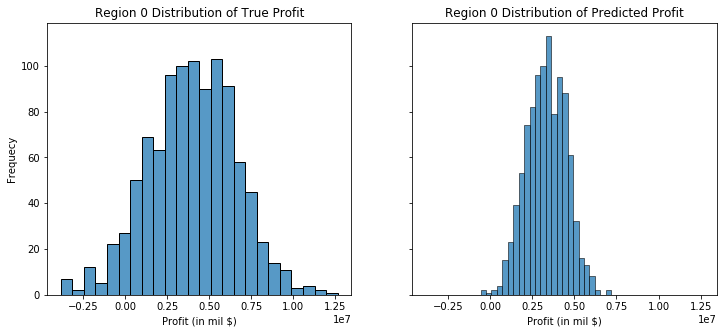

Region 1


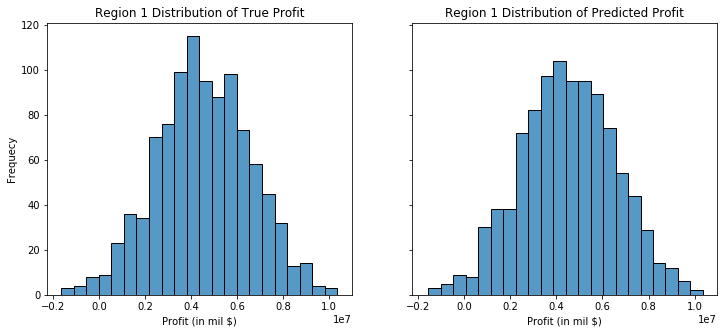

Region 2


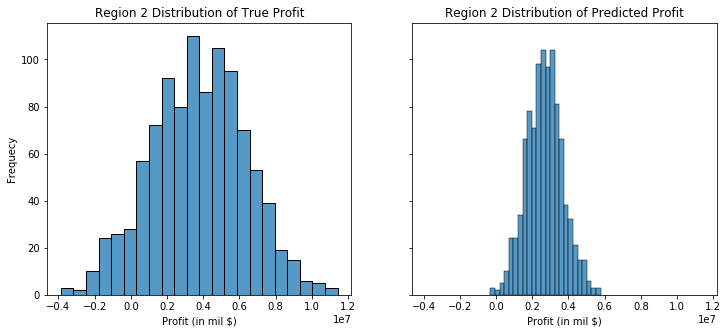

In [57]:
r = 0
for reg_dict in regions_profit:
    print('Region '+str(r))
    dist_plot(df = reg_dict['profit_df'], location = r,  size = [12, 5])
    r += 1

#### Description & conclusion:

- Region 2 has the highest value of negative profits compared to the other (almost -0.5).
- Region 1 has the lowest value of negative profits compared to the other (around -0.2).
- Region 1 has the highest peak of profits around 0.4 mil, and it seems that it would have the highest profit out of the 3 regions.
- region 1 predictions are the best by far.

In [58]:
r = 0
for reg_dict in regions_profit:
    print('The Average Profit for Region'+str(r)+':\n True Profit: $',round((reg_dict['average_profit'][0] / 1000000), 2),'mil.\n Pred Profit: $',round((reg_dict['average_profit'][1] / 1000000), 2),'mil.')
    r += 1
    print()

The Average Profit for Region0:
 True Profit: $ 4.0 mil.
 Pred Profit: $ 3.31 mil.

The Average Profit for Region1:
 True Profit: $ 4.52 mil.
 Pred Profit: $ 4.5 mil.

The Average Profit for Region2:
 True Profit: $ 3.75 mil.
 Pred Profit: $ 2.69 mil.



#### Conclusion:

- The highest average profit is of region 1.
- The estimated average profit for region 1 is very close to the real average, while the rest of the regions are relativley far.

### Confidence level

In [59]:
r = 0
for reg_dict in regions_profit:
    print('95% Confidence Interval Region'+str(r)+':\n Lower Bound:',round(reg_dict['confidence_interval'][0], 2),'\n Upper Bound:',round(reg_dict['confidence_interval'][1], 2))    
    r += 1
    print()

95% Confidence Interval Region0:
 Lower Bound: 3834659.45 
 Upper Bound: 4156850.11

95% Confidence Interval Region1:
 Lower Bound: 4393369.21 
 Upper Bound: 4647608.61

95% Confidence Interval Region2:
 Lower Bound: 3587346.8 
 Upper Bound: 3912851.26



#### Conclusion:
- The highest confidence level is of region 1.

### Risk of losses:

In [60]:
r = 0
for reg_dict in regions_profit:
    print('Risk of Losses for Region '+str(r)+': {:.2%}'.format(reg_dict['loss_risk']))
    r += 1
    print()

Risk of Losses for Region 0: 6.00%

Risk of Losses for Region 1: 1.50%

Risk of Losses for Region 2: 8.00%



#### Conclusion:
- Region 1 has the lowest risk of losses by a margin

### Conclusion:

- The highest average profit is of region 1.
- The lowest risk is for region 1 by a significant margin.
- The highest confidence interval is of region 1.
- region 1 has the lowest  value of negative profits compared to the other (around -0.2).
- region 1 has the highest peak of profits around 0.4 mil, and it seems that it would have the best profit out of the 3 regions.

- The highest risk belongs to region 2.

Our study shows that the best investment would come from region 1 as it has the lowest risk, the highest average profit and highest values in our confidence interval with the smallest interval.